# Importing the data and libraries

In [283]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [248]:
#importing the csv arquives
precos = pd.read_csv("precos.csv", sep = ";")
pesos = pd.read_csv("pesos.csv", sep = ";")

In [249]:
#Filling empty values (NA) with the last value of the series before the NA value.
precos.fillna(method="ffill", inplace = True)
pesos.fillna(method="ffill", inplace = True)      

# Managing the data

In [250]:
# Dropping useless columns and storing in the new dataframe "precos2"
precos2 = precos.drop(precos.columns[14:], axis = 1)

# Dropping useless columns and storing in the new dataframe "precos2"
precos2 = precos2.drop(precos.columns[:1], axis = 1)


#setting the date (from the pesos dataset) as the index of the dataframe
precos2.set_index(precos['date'], inplace = True)

#deleting different assets between Dataframes using the question 1B
precos2.drop("Benchmark Mercado",axis= 1, inplace = True)
precos2.drop("Risk Free",axis= 1, inplace = True)
precos2.drop("GGGG3",axis= 1, inplace = True)

In [251]:
#setting the prices dataset to a 100 basis and storing it in precos100
precos100 = precos2/precos2.iloc[0]*100

In [252]:
pesos2 = pesos.set_index(precos["date"])
pesos2 = pesos2.drop(pesos.columns[:1], axis = 1)

In [253]:
#deleting different assets between Dataframes using the question 1B
pesos2.drop("TTTT4",axis= 1, inplace = True)
pesos2.drop("Unnamed: 12",axis= 1, inplace = True)

In [256]:
#The porforlio return will be the sum of pesos times preco100
portfolio_return = (((precos100*pesos2).sum(axis = 1))/100-1)*100

<AxesSubplot:xlabel='date'>

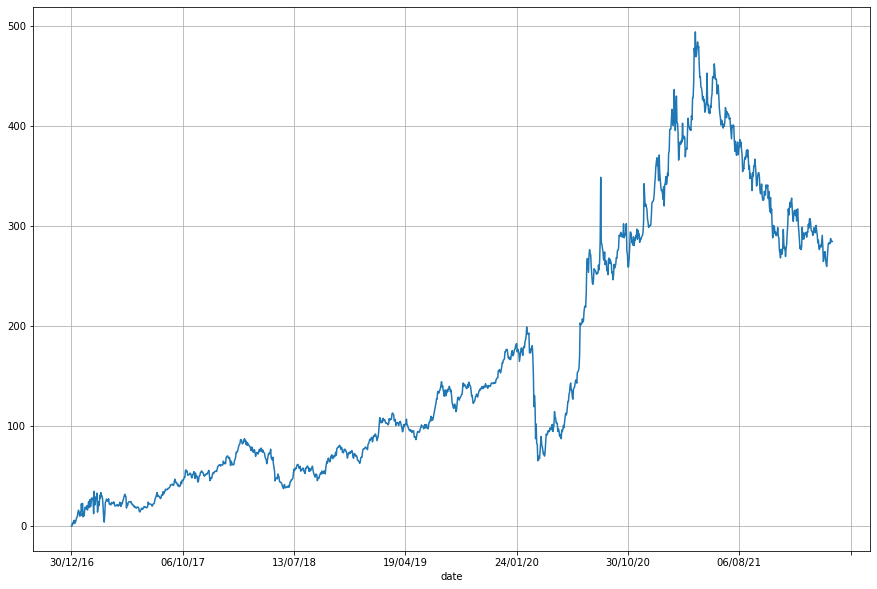

In [258]:
#plotting the portfolio return (%)

portfolio_return.plot(figsize = (15,10), grid= True)

# Question 3A

In [260]:
#portfolio Monthly return
tt = ((portfolio_return.iloc[-1]/100+1)**(21/len(portfolio_return))-1)
print("the portfolio monthly return is {} percent.".format(tt*100))

the portfolio monthly return is 2.0887795415341026 percent.


In [280]:
m_return = portfolio_return.pct_change(21)
m_return.dropna(inplace = True)
m_return

date
30/01/17   -3.092330e+07
31/01/17   -2.816040e+02
01/02/17    2.655314e+00
02/02/17    6.961623e+00
03/02/17    3.102969e+00
                ...     
23/03/22   -1.205987e-02
24/03/22    3.525045e-02
25/03/22    2.763322e-02
28/03/22    1.504861e-02
29/03/22    1.401285e-02
Length: 1347, dtype: float64

# Question 3B

In [261]:
#Total return
print("the portfolio total return in the period is {} percent".format(portfolio_return.iloc[-1]))

the portfolio total return in the period is 284.46193492351034 percent


In [262]:
#Annualized return
ttt = ((portfolio_return.iloc[-1]/100+1)**(252/len(portfolio_return))-1)
print("the portfolio annualized return is {} percent.".format(ttt*100))

the portfolio annualized return is 28.155173502635567 percent.


# Question 3C

In [274]:
###daily vol
(portfolio_return/100).std()

1.2926554381693611

In [278]:
###monthly vol

mm = ((portfolio_return/100).std())*252**0.5
print("The annual volatility of the portfolio is {} percent".format(mm))

The annual volatility of the portfolio is 20.520268921748162 percent


# Question 3D

In [287]:
#creating an empty list of 0s
buckets = []
buckets = [0] * len(m_return)

#Making a Students-T test
stat, p = ttest_ind(buckets, m_return)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=1.000, p=0.317
Probably the same distribution
